### Section 1 : Data Loading and Visualization

In [1]:
#Import necessary libraries
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define the full path to the T1 image
T1_path = r"C:\Users\Devshree Deshmukh\OneDrive\Desktop\MSc Project\BraTS_ML_Project\data\UPenn_GBM\images\UPENN-GBM-00042_11\UPENN-GBM-00042_11_T1.nii.gz"

# Check if the file exists
if os.path.exists(T1_path):
    print("File found:", T1_path)
else:
    print("File not found. Please verify the path.")

File found: C:\Users\Devshree Deshmukh\OneDrive\Desktop\MSc Project\BraTS_ML_Project\data\UPenn_GBM\images\UPENN-GBM-00042_11\UPENN-GBM-00042_11_T1.nii.gz


In [ ]:
# Load the T1 image using nibabel
T1_img = nib.load(T1_path)
T1_data = T1_img.get_fdata()
print("T1 image shape:", T1_data.shape)

T1 image shape: (240, 240, 155)


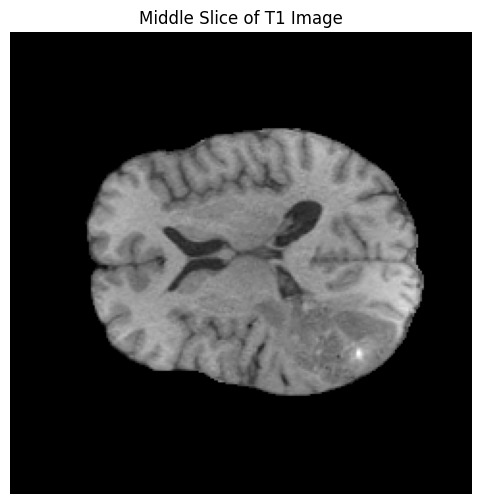

In [7]:
# Display the middle slice of the volume
middle_slice = T1_data.shape[2] // 2
plt.figure(figsize=(6,6))
plt.imshow(T1_data[:, :, middle_slice], cmap='gray')
plt.title("Middle Slice of T1 Image")
plt.axis('off')
plt.show()

In [8]:
# Path to the segmentation mask
mask_path = r"C:\Users\Devshree Deshmukh\OneDrive\Desktop\MSc Project\BraTS_ML_Project\data\UPenn_GBM\segmentations\UPENN-GBM-00042_11\UPENN-GBM-00042_11_automated_approx_segm.nii.gz"

Segmentation mask shape: (240, 240, 155)


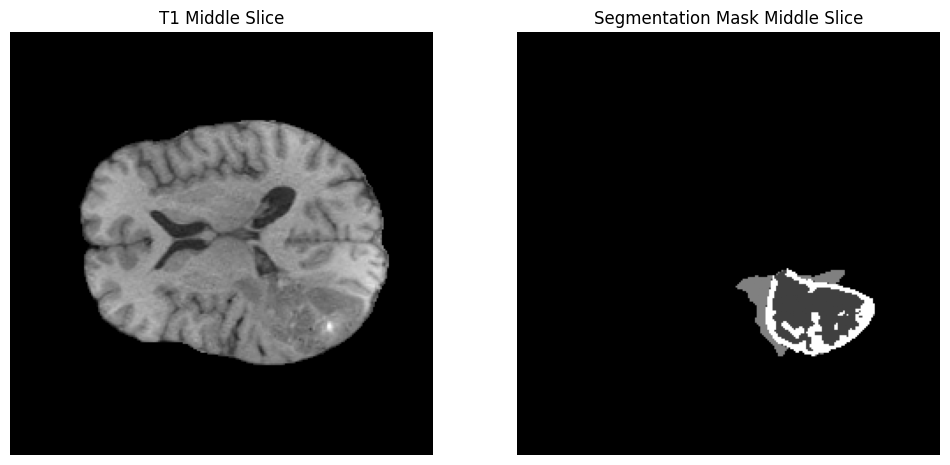

In [9]:
if os.path.exists(mask_path):
    seg_img = nib.load(mask_path)
    seg_data = seg_img.get_fdata()
    print("Segmentation mask shape:", seg_data.shape)
    
    # Visualize the same middle slice as the T1 image
    middle_slice = seg_data.shape[2] // 2
    
    plt.figure(figsize=(12,6))
    # Left: T1
    plt.subplot(1, 2, 1)
    plt.imshow(T1_data[:, :, middle_slice], cmap='gray')
    plt.title("T1 Middle Slice")
    plt.axis('off')

    # Right: Mask
    plt.subplot(1, 2, 2)
    plt.imshow(seg_data[:, :, middle_slice], cmap='gray')
    plt.title("Segmentation Mask Middle Slice")
    plt.axis('off')

    plt.show()
else:
    print("Segmentation mask file not found. Please check the path.")

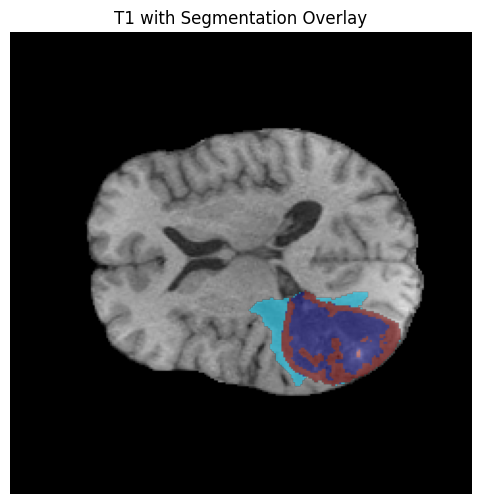

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# We already have T1_data and seg_data loaded.
middle_slice = T1_data.shape[2] // 2

overlay_slice = T1_data[:, :, middle_slice].copy()
overlay_mask = seg_data[:, :, middle_slice]
plt.figure(figsize=(6,6))
plt.imshow(overlay_slice, cmap='gray')

# Mask non-tumour areas so they don’t overwrite the T1 image
plt.imshow(np.ma.masked_where(overlay_mask == 0, overlay_mask), 
           cmap='jet', alpha=0.5)
plt.title("T1 with Segmentation Overlay")
plt.axis('off')
plt.show()

### Section 2: Data Statistics

In [12]:
import numpy as np

# 1. Tumour voxel count
tumour_voxels = np.count_nonzero(seg_data)
print("Number of tumour voxels:", tumour_voxels)

# 2. Voxel dimensions (mm) from the NIfTI header
voxel_dims = seg_img.header.get_zooms()  # (x_spacing, y_spacing, z_spacing)
voxel_volume_mm3 = voxel_dims[0] * voxel_dims[1] * voxel_dims[2]

# 3. Tumour volume in mm³
tumour_volume_mm3 = tumour_voxels * voxel_volume_mm3
print("Approx. tumour volume (mm³):", tumour_volume_mm3)

# 4. Mean intensity within the tumour on T1
tumour_intensity_values = T1_data[seg_data > 0]
mean_intensity = np.mean(tumour_intensity_values)
print("Mean intensity inside tumour on T1:", mean_intensity)

Number of tumour voxels: 101080
Approx. tumour volume (mm³): 101080.0
Mean intensity inside tumour on T1: 354.80265136525526


### Section 3 :Apply the same loop to the Entire Dataset

In [13]:
# Paths to images and segmentations folders
images_dir = r"C:\Users\Devshree Deshmukh\OneDrive\Desktop\MSc Project\BraTS_ML_Project\data\UPenn_GBM\images"
segs_dir = r"C:\Users\Devshree Deshmukh\OneDrive\Desktop\MSc Project\BraTS_ML_Project\data\UPenn_GBM\segmentations"

# A list to store the results for each patient
results = []

In [ ]:
# Loop through each patient folder in 'images'
for patient_folder in os.listdir(images_dir):
    # Construct full paths
    patient_image_folder = os.path.join(images_dir, patient_folder)
    patient_seg_folder = os.path.join(segs_dir, patient_folder)
    
    # Ensure it's a directory (skip files)
    if not os.path.isdir(patient_image_folder):
        continue
    
    # Identify the T1 file (adjust naming if necessary)
    T1_file_name = f"{patient_folder}_T1.nii.gz"
    T1_path = os.path.join(patient_image_folder, T1_file_name)
    
    # Identify the segmentation file
    seg_file_name = f"{patient_folder}_automated_approx_segm.nii.gz"
    seg_path = os.path.join(patient_seg_folder, seg_file_name)
    
    # Check if both files exist
    if not (os.path.exists(T1_path) and os.path.exists(seg_path)):
        print(f"Skipping {patient_folder}: T1 or segmentation file not found.")
        continue
    
    # Load the data
    T1_img = nib.load(T1_path)
    T1_data = T1_img.get_fdata()
    
    seg_img = nib.load(seg_path)
    seg_data = seg_img.get_fdata()
    
    # Compute tumour voxel count
    tumour_voxels = np.count_nonzero(seg_data)
    
    # Get voxel dimensions (x_spacing, y_spacing, z_spacing)
    voxel_dims = seg_img.header.get_zooms()  
    voxel_volume_mm3 = voxel_dims[0] * voxel_dims[1] * voxel_dims[2]
    
    # Tumour volume in mm³
    tumour_volume_mm3 = tumour_voxels * voxel_volume_mm3
    
    # Mean intensity inside tumour on T1
    tumour_intensity_values = T1_data[seg_data > 0]
    mean_intensity = np.mean(tumour_intensity_values) if len(tumour_intensity_values) > 0 else 0.0
    
    # Store results
    results.append({
        'patient_id': patient_folder,
        'tumour_voxels': tumour_voxels,
        'tumour_volume_mm3': tumour_volume_mm3,
        'mean_T1_intensity': mean_intensity
    })

In [15]:
import pandas as pd
# Convert to DataFrame
df_results = pd.DataFrame(results)
# Quick check
df_results.head()

,patient_id,tumour_voxels,tumour_volume_mm3,mean_T1_intensity
0,UPENN-GBM-00001_11,23160,23160.0,306.032513
1,UPENN-GBM-00002_11,200670,200670.0,303.177635
2,UPENN-GBM-00003_11,67650,67650.0,285.410407
3,UPENN-GBM-00004_11,56097,56097.0,320.502790
4,UPENN-GBM-00005_11,89027,89027.0,334.613140


In [16]:
# Save to CSV
output_csv = "tumour_metrics.csv"
df_results.to_csv(output_csv, index=False)
print(f"Saved results to {output_csv}")

Saved results to tumour_metrics.csv


### Section 4: Data Analysis

In [17]:
import pandas as pd
df = pd.read_csv("tumour_metrics.csv")
df.head()

,patient_id,tumour_voxels,tumour_volume_mm3,mean_T1_intensity
0,UPENN-GBM-00001_11,23160,23160.0,306.032513
1,UPENN-GBM-00002_11,200670,200670.0,303.177635
2,UPENN-GBM-00003_11,67650,67650.0,285.410407
3,UPENN-GBM-00004_11,56097,56097.0,320.502790
4,UPENN-GBM-00005_11,89027,89027.0,334.613140


In [18]:
df.describe()

,tumour_voxels,tumour_volume_mm3,mean_T1_intensity
count,611.000000,611.000000,611.000000
mean,83659.454992,83659.454992,330.460712
std,51043.105992,51043.105992,109.209556
min,3647.000000,3647.000000,59.949158
25%,41773.000000,41773.000000,285.286307
50%,76858.000000,76858.000000,316.918993
75%,119944.000000,119944.000000,352.665855
max,235963.000000,235963.000000,1600.096499


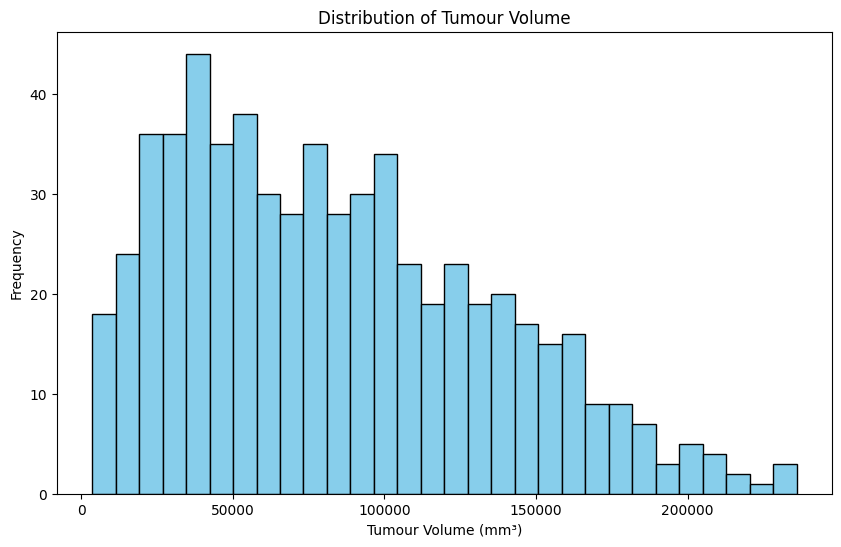

In [19]:
# Visualize the distribution of tumour volumes
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['tumour_volume_mm3'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tumour Volume (mm³)')
plt.ylabel('Frequency')
plt.title('Distribution of Tumour Volume')
plt.show()

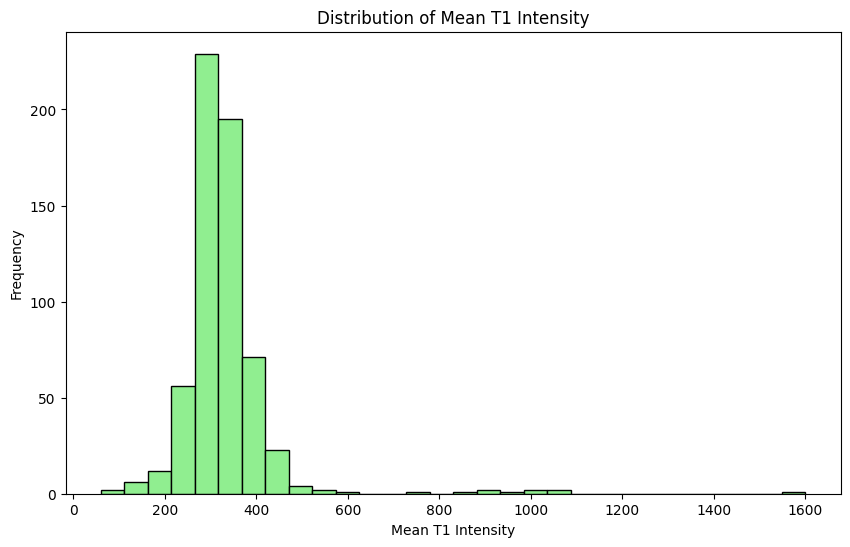

In [20]:
#visualize the mean T1 intensity
plt.figure(figsize=(10,6))
plt.hist(df['mean_T1_intensity'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Mean T1 Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Mean T1 Intensity')
plt.show()

In [21]:
# Calculate the quartile thresholds for tumour volume and mean intensity
volume_q25 = df['tumour_volume_mm3'].quantile(0.25)
volume_q75 = df['tumour_volume_mm3'].quantile(0.75)
intensity_q25 = df['mean_T1_intensity'].quantile(0.25)
intensity_q75 = df['mean_T1_intensity'].quantile(0.75)

print("\nThresholds:")
print(f"Volume 25th percentile: {volume_q25:.2f}, 75th percentile: {volume_q75:.2f}")
print(f"Intensity 25th percentile: {intensity_q25:.2f}, 75th percentile: {intensity_q75:.2f}")


Thresholds:
Volume 25th percentile: 41773.00, 75th percentile: 119944.00
Intensity 25th percentile: 285.29, 75th percentile: 352.67


In [22]:
# Function to assign groups based on thresholds
def assign_group(row):
    if row['tumour_volume_mm3'] < volume_q25 and row['mean_T1_intensity'] < intensity_q25:
        return 'A'  # Hard to detect both visually and for the model
    elif row['tumour_volume_mm3'] > volume_q75 and row['mean_T1_intensity'] > intensity_q75:
        return 'C'  # Easy to detect visually and for the model
    else:
        return 'B'  # Intermediate or mixed cases

# Apply the function to each row
df['group'] = df.apply(assign_group, axis=1)

print("\nData with Group Assignments:")
print(df[['patient_id', 'tumour_volume_mm3', 'mean_T1_intensity', 'group']].head())


Data with Group Assignments:
           patient_id  tumour_volume_mm3  mean_T1_intensity group
0  UPENN-GBM-00001_11            23160.0         306.032513     B
1  UPENN-GBM-00002_11           200670.0         303.177635     B
2  UPENN-GBM-00003_11            67650.0         285.410407     B
3  UPENN-GBM-00004_11            56097.0         320.502790     B
4  UPENN-GBM-00005_11            89027.0         334.613140     B


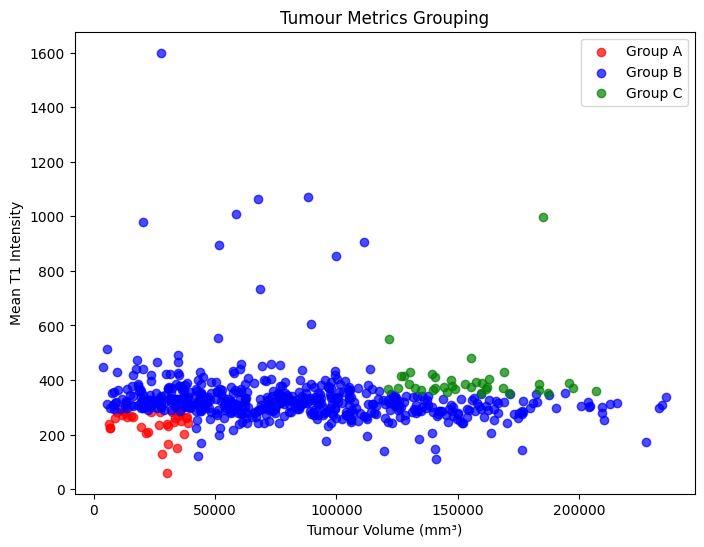

In [23]:
# Visualize the groups on a scatter plot
colors = {'A': 'red', 'B': 'blue', 'C': 'green'}
plt.figure(figsize=(8,6))
for group in ['A', 'B', 'C']:
    subset = df[df['group'] == group]
    plt.scatter(subset['tumour_volume_mm3'], subset['mean_T1_intensity'], 
                color=colors[group], label=f"Group {group}", alpha=0.7)
plt.xlabel("Tumour Volume (mm³)")
plt.ylabel("Mean T1 Intensity")
plt.title("Tumour Metrics Grouping")
plt.legend()
plt.show()

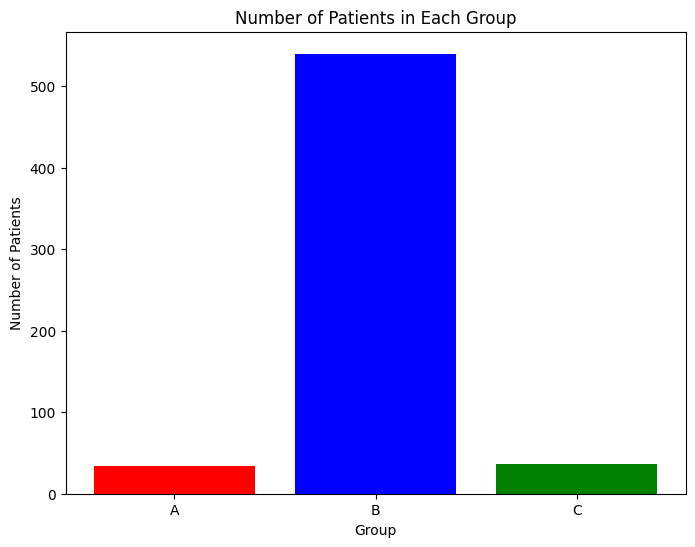

In [24]:
# Calculate group counts
group_counts = df['group'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(group_counts.index, group_counts.values, color=['red', 'blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Number of Patients')
plt.title('Number of Patients in Each Group')
plt.show()

In [25]:
df.to_csv("tumour_metrics_with_groups.csv", index=False)
print("\nSaved updated results to 'tumour_metrics_with_groups.csv'.")


Saved updated results to 'tumour_metrics_with_groups.csv'.
